In [356]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

In [357]:
df_test = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\data\Testing.csv')
df = pd.read_csv('D:\AIT\Sem 1\Machine Learning\Medical_prediction\Medical_prediction\data\Training.csv')

In [358]:
pd.set_option('display.max_columns', None)
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [359]:
columns_with_zeros = df.columns[(df == 0).all()]
columns_with_zeros

Index(['fluid_overload'], dtype='object')

In [360]:
df.drop(columns=['fluid_overload.1','fluid_overload'],inplace=True)

In [361]:
df.prognosis.unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [362]:
label_mapping = {
    'Acne': 'Skin Disorders',
    'Psoriasis': 'Skin Disorders',
    'Impetigo': 'Skin Disorders'
}

df['prognosis'] = df['prognosis'].replace(label_mapping)

In [363]:
skin_disorders_symptoms = df[df['prognosis'] == 'Skin Disorders'].iloc[:, :-2]

skin_disorders_symptoms = skin_disorders_symptoms.columns[skin_disorders_symptoms.eq(1).any()]

skin_disorders_symptoms_list = skin_disorders_symptoms.tolist()

In [364]:
skin_disorders_symptoms_list

['skin_rash',
 'joint_pain',
 'high_fever',
 'pus_filled_pimples',
 'blackheads',
 'scurring',
 'skin_peeling',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'blister',
 'red_sore_around_nose',
 'yellow_crust_ooze']

In [365]:
symptom_column = 'yellow_crust_ooze'

diseases_with_symptom = df[df[symptom_column] == 1]['prognosis']

In [366]:
diseases_with_symptom.unique()

array(['Skin Disorders'], dtype=object)

In [367]:
columns_to_drop = ['pus_filled_pimples', 'blackheads', 'scurring', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails', 'blister', 'red_sore_around_nose', 'skin_peeling','yellow_crust_ooze']
df.drop(columns=columns_to_drop, inplace=True)

In [368]:
df = df[df['prognosis'] != 'Skin Disorders']

In [369]:
df.shape

(4560, 122)

In [370]:
df.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_o

In [371]:
diseases_with_chills = df[df['chills'] == 1]['prognosis']
diseases_with_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [372]:
diseases_with_shivering = df[df['shivering'] == 1]['prognosis']
diseases_with_shivering.unique()

array(['Allergy'], dtype=object)

In [373]:
df['shivering_or_chills'] = df['shivering'] | df['chills']
df.drop(columns=['shivering','chills'], inplace=True)

In [374]:
diseases_with_shivering_or_chills = df[df['shivering_or_chills'] == 1]['prognosis']
diseases_with_shivering_or_chills.unique()

array(['Allergy', 'Malaria', 'Dengue', 'Typhoid', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [375]:
diseases_with_nodal_skin_eruptions = df[df['nodal_skin_eruptions'] == 1]['prognosis']
diseases_with_nodal_skin_eruptions.unique()

array(['Fungal infection'], dtype=object)

In [376]:
diseases_with_nodal_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_nodal_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [377]:
df['skin_rash'] = df['nodal_skin_eruptions'] | df['skin_rash']
df.drop(columns=['nodal_skin_eruptions'], inplace=True)

In [378]:
diseases_with_skin_rash = df[df['skin_rash'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Fungal infection', 'Drug Reaction', 'Chicken pox', 'Dengue'],
      dtype=object)

In [379]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          1                    0           0             0        0   
2        1          1                    0           0             0        0   
3        1          1                    0           0             0        0   
4        1          1                    0           0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  \
0            0            0             0         0                  0   
1            0            0             0         0                  0   
2            0            0             0         0                  0   
3            0            0             0         0                  0   
4            0            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3  

In [380]:
diseases_with_skin_rash = df[df['malaise'] == 1]['prognosis']
diseases_with_skin_rash.unique()

array(['Chicken pox', 'Dengue', 'Hepatitis B', 'Tuberculosis',
       'Common Cold', 'Pneumonia'], dtype=object)

In [381]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise',
 'receiving_blood_transfusion',
 'receiving_unsterile_injections']

In [382]:
diseases_with_receiving_unsterile_injections = df[df['receiving_unsterile_injections'] == 1]['prognosis']
diseases_with_receiving_unsterile_injections.unique()

array(['Hepatitis B'], dtype=object)

In [383]:
diseases_with_receiving_blood_transfusion = df[df['receiving_blood_transfusion'] == 1]['prognosis']
diseases_with_receiving_blood_transfusion.unique()

array(['Hepatitis B'], dtype=object)

In [384]:
df['unprotected_blood_transfusion'] = df['receiving_blood_transfusion'] | df['receiving_unsterile_injections']
df.drop(columns=['receiving_blood_transfusion','receiving_unsterile_injections'], inplace=True)

In [385]:
hepatitis_B_symptoms = df[df['prognosis'] == 'Hepatitis B'].iloc[:, :-2]

hepatitis_B_symptoms = hepatitis_B_symptoms.columns[hepatitis_B_symptoms.eq(1).any()]

hepatitis_B_symptoms_list = hepatitis_B_symptoms.tolist()
hepatitis_B_symptoms_list

['itching',
 'fatigue',
 'lethargy',
 'yellowish_skin',
 'dark_urine',
 'loss_of_appetite',
 'abdominal_pain',
 'yellow_urine',
 'yellowing_of_eyes',
 'malaise']

In [386]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          1                    0           0             0        0   
2        1          1                    0           0             0        0   
3        1          1                    0           0             0        0   
4        1          1                    0           0             0        0   

   ulcers_on_tongue  muscle_wasting  vomiting  burning_micturition  \
0                 0               0         0                    0   
1                 0               0         0                    0   
2                 0               0         0                    0   
3                 0               0         0                    0   
4                 0               0         0                    0   

   spotting_ urination  fatigue  weight_gain  anxiety  cold_hands_and_feets  \
0                    0        0            0        0                     0   
1                    0        0            0        0                     0   
2                    0        0            0        0                     0   
3                    0        0            0        0                     0   
4                    0        0            0        0                     0   

   mood_swings  weight_loss  restlessness  lethargy  patches_in_throat  \
0            0            0             0         0                  0   
1            0            0             0         0                  0   
2            0            0             0         0                  0   
3            0            0             0         0                  0   
4            0            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3  

In [387]:
diseases_with_muscle_wasting = df[df['muscle_wasting'] == 1]['prognosis']
diseases_with_muscle_wasting.unique()

array(['AIDS'], dtype=object)

In [388]:
AIDS_symptoms = df[df['prognosis'] == 'AIDS'].iloc[:, :-2]

AIDS_symptoms = AIDS_symptoms.columns[AIDS_symptoms.eq(1).any()]

AIDS_symptoms_list = AIDS_symptoms.tolist()
AIDS_symptoms_list

['muscle_wasting', 'patches_in_throat', 'high_fever', 'extra_marital_contacts']

In [389]:
diseases_with_patches_in_throat = df[df['patches_in_throat'] == 1]['prognosis']
diseases_with_patches_in_throat.unique()

array(['AIDS'], dtype=object)

In [390]:
df['patches_in_throat'] = df['patches_in_throat'] | df['muscle_wasting']
df.drop(columns=['patches_in_throat','muscle_wasting'], inplace=True)

In [391]:
df['fatigue'] = df['fatigue'] | df['lethargy']
df.drop(columns=['fatigue','lethargy'], inplace=True)

In [392]:
diseases_with_vomiting = df[df['vomiting'] == 1]['prognosis']
diseases_with_vomiting.unique()

array(['GERD', 'Chronic cholestasis', 'Peptic ulcer diseae',
       'Gastroenteritis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Dengue', 'Typhoid', 'hepatitis A', 'Hepatitis D',
       'Hepatitis E', 'Alcoholic hepatitis', 'Tuberculosis',
       'Heart attack', 'Hypoglycemia',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [393]:
diseases_with_nausea = df[df['nausea'] == 1]['prognosis']
diseases_with_nausea.unique()

array(['Chronic cholestasis', 'Malaria', 'Dengue', 'Typhoid',
       'hepatitis A', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypoglycemia', '(vertigo) Paroymsal  Positional Vertigo'],
      dtype=object)

In [394]:
df['vomiting'] = df['vomiting'] | df['nausea']
df.drop(columns=['vomiting','nausea'], inplace=True)

In [395]:
diseases_with_sinus_pressure = df[df['sinus_pressure'] == 1]['prognosis']
diseases_with_sinus_pressure.unique()

array(['Common Cold'], dtype=object)

In [396]:
diseases_with_runny_nose = df[df['runny_nose'] == 1]['prognosis']
diseases_with_runny_nose.unique()

array(['Common Cold'], dtype=object)

In [397]:
df['runny_nose'] = df['runny_nose'] | df['sinus_pressure']
df.drop(columns=['sinus_pressure','runny_nose'], inplace=True)

In [398]:
diseases_with_loss_of_balance = df[df['loss_of_balance'] == 1]['prognosis']
diseases_with_loss_of_balance.unique()

array(['Hypertension ', 'Cervical spondylosis',
       '(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [399]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [400]:
df['unsteadiness'] = df['unsteadiness'] | df['loss_of_balance']
df.drop(columns=['loss_of_balance','unsteadiness'], inplace=True)

In [401]:
diseases_with_unsteadiness = df[df['unsteadiness'] == 1]['prognosis']
diseases_with_unsteadiness.unique()

KeyError: 'unsteadiness'

In [ ]:
diseases_with_distention_of_abdomen = df[df['distention_of_abdomen'] == 1]['prognosis']
diseases_with_distention_of_abdomen.unique()

array(['Alcoholic hepatitis'], dtype=object)

In [ ]:
Alcoholic_hepatitis_symptoms = df[df['prognosis'] == 'Alcoholic hepatitis'].iloc[:, :-2]

Alcoholic_hepatitis_symptoms = Alcoholic_hepatitis_symptoms.columns[Alcoholic_hepatitis_symptoms.eq(1).any()]

Alcoholic_hepatitis_symptoms_list = Alcoholic_hepatitis_symptoms.tolist()
Alcoholic_hepatitis_symptoms_list

['yellowish_skin',
 'abdominal_pain',
 'swelling_of_stomach',
 'distention_of_abdomen',
 'history_of_alcohol_consumption']

In [ ]:
df['distention_of_abdomen'] = df['distention_of_abdomen'] | df['history_of_alcohol_consumption']
df.drop(columns=['history_of_alcohol_consumption','distention_of_abdomen'], inplace=True)

In [350]:
diseases_with_extra_marital_contacts = df[df['extra_marital_contacts'] == 1]['prognosis']
diseases_with_extra_marital_contacts.unique()

array(['AIDS'], dtype=object)

In [402]:
df['unprotected_blood/sex_transfusion'] = df['unprotected_blood_transfusion'] | df['extra_marital_contacts']
df.drop(columns=['extra_marital_contacts','unprotected_blood_transfusion'], inplace=True)

In [354]:
diseases_with_pain_in_anal_region = df[df['pain_in_anal_region'] == 1]['prognosis']
diseases_with_pain_in_anal_region.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [355]:
diseases_with_irritation_in_anus = df[df['irritation_in_anus'] == 1]['prognosis']
diseases_with_irritation_in_anus.unique()

array(['Dimorphic hemmorhoids(piles)'], dtype=object)

In [403]:
df['pain/irritation_in_anal_region'] = df['pain_in_anal_region'] | df['irritation_in_anus']
df.drop(columns=['irritation_in_anus','pain_in_anal_region'], inplace=True)

In [410]:
diseases_with_dischromic_patches = df[df['dischromic _patches'] == 1]['prognosis']
diseases_with_dischromic_patches.unique()

array(['Fungal infection'], dtype=object)

In [412]:
df.rename(columns={'dischromic _patches': 'dischromic_patches'}, inplace=True)

In [415]:
diseases_with_joint_pain = df[df['joint_pain'] == 1]['prognosis']
diseases_with_joint_pain.unique()

array(['Dengue', 'hepatitis A', 'Hepatitis D', 'Hepatitis E',
       'Osteoarthristis'], dtype=object)

In [417]:
diseases_with_swelling_joints = df[df['swelling_joints'] == 1]['prognosis']
diseases_with_swelling_joints.unique()

array(['Osteoarthristis', 'Arthritis'], dtype=object)

In [418]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          1                    0           0             0        0   
2        1          1                    0           0             0        0   
3        1          1                    0           0             0        0   
4        1          1                    0           0             0        0   

   ulcers_on_tongue  burning_micturition  spotting_ urination  weight_gain  \
0                 0                    0                    0            0   
1                 0                    0                    0            0   
2                 0                    0                    0            0   
3                 0                    0                    0            0   
4                 0                    0                    0            0   

   anxiety  cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
0        0                     0            0            0             0   
1        0                     0            0            0             0   
2        0                     0            0            0             0   
3        0                     0            0            0             0   
4        0                     0            0            0             0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0                 0                     0          0             0   
1                 0                     0          0             0   
2                 0                     0          0             0   
3                 0                     0          0             0   
4                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3                    0                    0                    0        0   
4                    0                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0                0   
1                             0       0                  0                0   
2                             0       0                  0                

In [420]:
df.shape

(4560, 107)

In [421]:
df.head()

itching  skin_rash  continuous_sneezing  joint_pain  stomach_pain  acidity  \
0        1          1                    0           0             0        0   
1        0          1                    0           0             0        0   
2        1          1                    0           0             0        0   
3        1          1                    0           0             0        0   
4        1          1                    0           0             0        0   

   ulcers_on_tongue  burning_micturition  spotting_ urination  weight_gain  \
0                 0                    0                    0            0   
1                 0                    0                    0            0   
2                 0                    0                    0            0   
3                 0                    0                    0            0   
4                 0                    0                    0            0   

   anxiety  cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
0        0                     0            0            0             0   
1        0                     0            0            0             0   
2        0                     0            0            0             0   
3        0                     0            0            0             0   
4        0                     0            0            0             0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0                 0                     0          0             0   
1                 0                     0          0             0   
2                 0                     0          0             0   
3                 0                     0          0             0   
4                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  swelling_of_stomach  swelled_lymph_nodes  malaise  \
0                    0                    0                    0        0   
1                    0                    0                    0        0   
2                    0                    0                    0        0   
3                    0                    0                    0        0   
4                    0                    0                    0        0   

   blurred_and_distorted_vision  phlegm  throat_irritation  redness_of_eyes  \
0                             0       0                  0                0   
1                             0       0                  0                0   
2                             0       0                  0                

In [422]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4560 entries, 0 to 4917
Columns: 107 entries, itching to pain/irritation_in_anal_region
dtypes: float64(1), int64(105), object(1)
memory usage: 3.8+ MB


In [423]:
import pandas as pd
pd.set_option('display.max_columns', None)


In [424]:
df.columns

Index(['itching', 'skin_rash', 'continuous_sneezing', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'burning_micturition',
       'spotting_ urination', 'weight_gain',
       ...
       'history_of_alcohol_consumption', 'blood_in_sputum',
       'prominent_veins_on_calf', 'palpitations', 'painful_walking',
       'prognosis', 'Unnamed: 133', 'shivering_or_chills',
       'unprotected_blood/sex_transfusion', 'pain/irritation_in_anal_region'],
      dtype='object', length=107)

In [425]:
pd.set_option('display.max_rows', None)
df.isna().sum()

itching                                 0
skin_rash                               0
continuous_sneezing                     0
joint_pain                              0
stomach_pain                            0
acidity                                 0
ulcers_on_tongue                        0
burning_micturition                     0
spotting_ urination                     0
weight_gain                             0
anxiety                                 0
cold_hands_and_feets                    0
mood_swings                             0
weight_loss                             0
restlessness                            0
irregular_sugar_level                   0
cough                                   0
high_fever                              0
sunken_eyes                             0
breathlessness                          0
sweating                                0
dehydration                             0
indigestion                             0
headache                          

In [426]:
df.describe()

itching    skin_rash  continuous_sneezing   joint_pain  \
count  4560.000000  4560.000000          4560.000000  4560.000000   
mean      0.148684     0.100000             0.048684     0.125000   
std       0.355816     0.300033             0.215231     0.330755   
min       0.000000     0.000000             0.000000     0.000000   
25%       0.000000     0.000000             0.000000     0.000000   
50%       0.000000     0.000000             0.000000     0.000000   
75%       0.000000     0.000000             0.000000     0.000000   
max       1.000000     1.000000             1.000000     1.000000   

       stomach_pain      acidity  ulcers_on_tongue  burning_micturition  \
count   4560.000000  4560.000000       4560.000000          4560.000000   
mean       0.048684     0.048684          0.023684             0.047368   
std        0.215231     0.215231          0.152080             0.212449   
min        0.000000     0.000000          0.000000             0.000000   
25%        0.000000     0.000000          0.000000             0.000000   
50%        0.000000     0.000000          0.000000             0.000000   
75%        0.000000     0.000000          0.000000             0.000000   
max        1.000000     1.000000          1.000000             1.000000   

       spotting_ urination  weight_gain      anxiety  cold_hands_and_feets  \
count          4560.000000  4560.000000  4560.000000           4560.000000   
mean              0.023684     0.025000     0.025000              0.025000   
std               0.152080     0.156142     0.156142              0.156142   
min               0.000000     0.000000     0.000000              0.000000   
25%               0.000000     0.000000     0.000000              0.000000   
50%               0.000000     0.000000     0.000000              0.000000   
75%               0.000000     0.000000     0.000000              0.000000   
max               1.000000     1.000000     1.000000              1.000000   

       mood_swings  weight_loss  restlessness  irregular_sugar_level  \
count  4560.000000  4560.000000   4560.000000            4560.000000   
mean      0.050000     0.100000      0.050000               0.025000   
std       0.217969     0.300033      0.217969               0.156142   
min       0.000000     0.000000      0.000000               0.000000   
25%       0.000000     0.000000      0.000000               0.000000   
50%       0.000000     0.000000      0.000000               0.000000   
75%       0.000000     0.000000      0.000000               0.000000   
max       1.000000     1.000000      1.000000               1.000000   

             cough   high_fever  sunken_eyes  breathlessness     sweating  \
count  4560.000000  4560.000000  4560.000000     4560.000000  4560.000000   
mean      0.123684     0.276316     0.023684        0.098684     0.148684   
std       0.329257     0.447224     0.152080        0.298270     0.355816   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%       0.000000     0.000000     0.000000        0.000000     0.000000   
50%       0.000000     0.000000     0.000000        0.000000     0.000000   
75%       0.000000     1.000000     0.000000        0.000000     0.000000   
max       1.000000     1.000000     1.000000        1.000000     1.000000   

       dehydration  indigestion     headache  yellowish_skin   dark_urine  \
count  4560.000000  4560.000000  4560.000000     4560.000000  4560.000000   
mean      0.023684     0.048684     0.248684        0.200000     0.125000   
std       0.152080     0.215231     0.432298        0.400044     0.330755   
min       0.000000     0.000000     0.000000        0.000000     0.000000   
25%       0.000000     0.000000     0.000000        0.000000     0.000000   
50%       0.000000     0.000000     0.000000        0.000000     0.000000   
75%       0.000000     0.000000     0.000000        0.000000     0.000000   
max       1.000000     1.000000     1.000000       

In [427]:
df.columns

Index(['itching', 'skin_rash', 'continuous_sneezing', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'burning_micturition',
       'spotting_ urination', 'weight_gain',
       ...
       'history_of_alcohol_consumption', 'blood_in_sputum',
       'prominent_veins_on_calf', 'palpitations', 'painful_walking',
       'prognosis', 'Unnamed: 133', 'shivering_or_chills',
       'unprotected_blood/sex_transfusion', 'pain/irritation_in_anal_region'],
      dtype='object', length=107)

In [428]:
df.columns[df.isnull().all()]

Index(['Unnamed: 133'], dtype='object')

In [429]:
df = df.drop('Unnamed: 133',axis=1)

In [430]:
df.shape

(4560, 106)

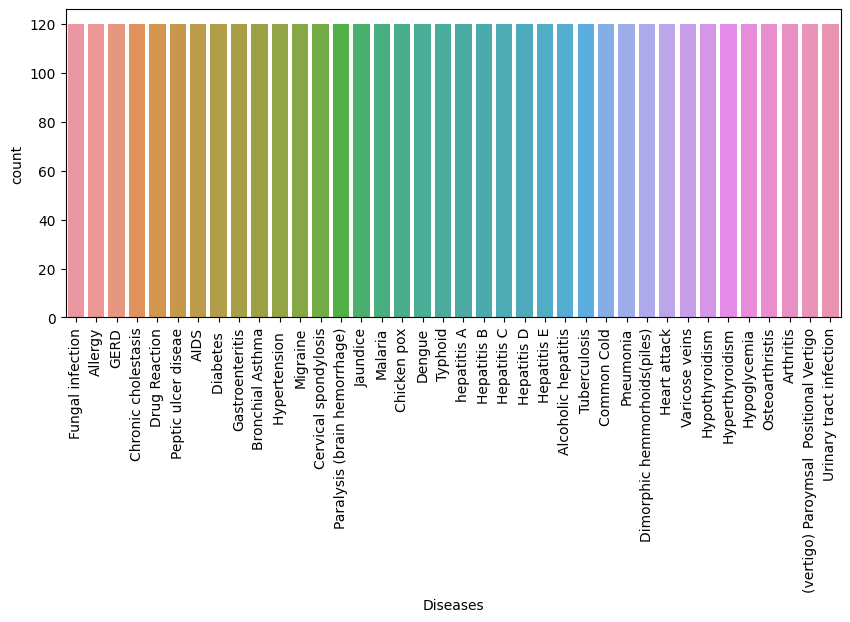

In [431]:
#countplot
plt.figure(figsize=(10,4))
sns.countplot(data=df,x='prognosis')
plt.xticks(rotation=90)
plt.xlabel('Diseases');

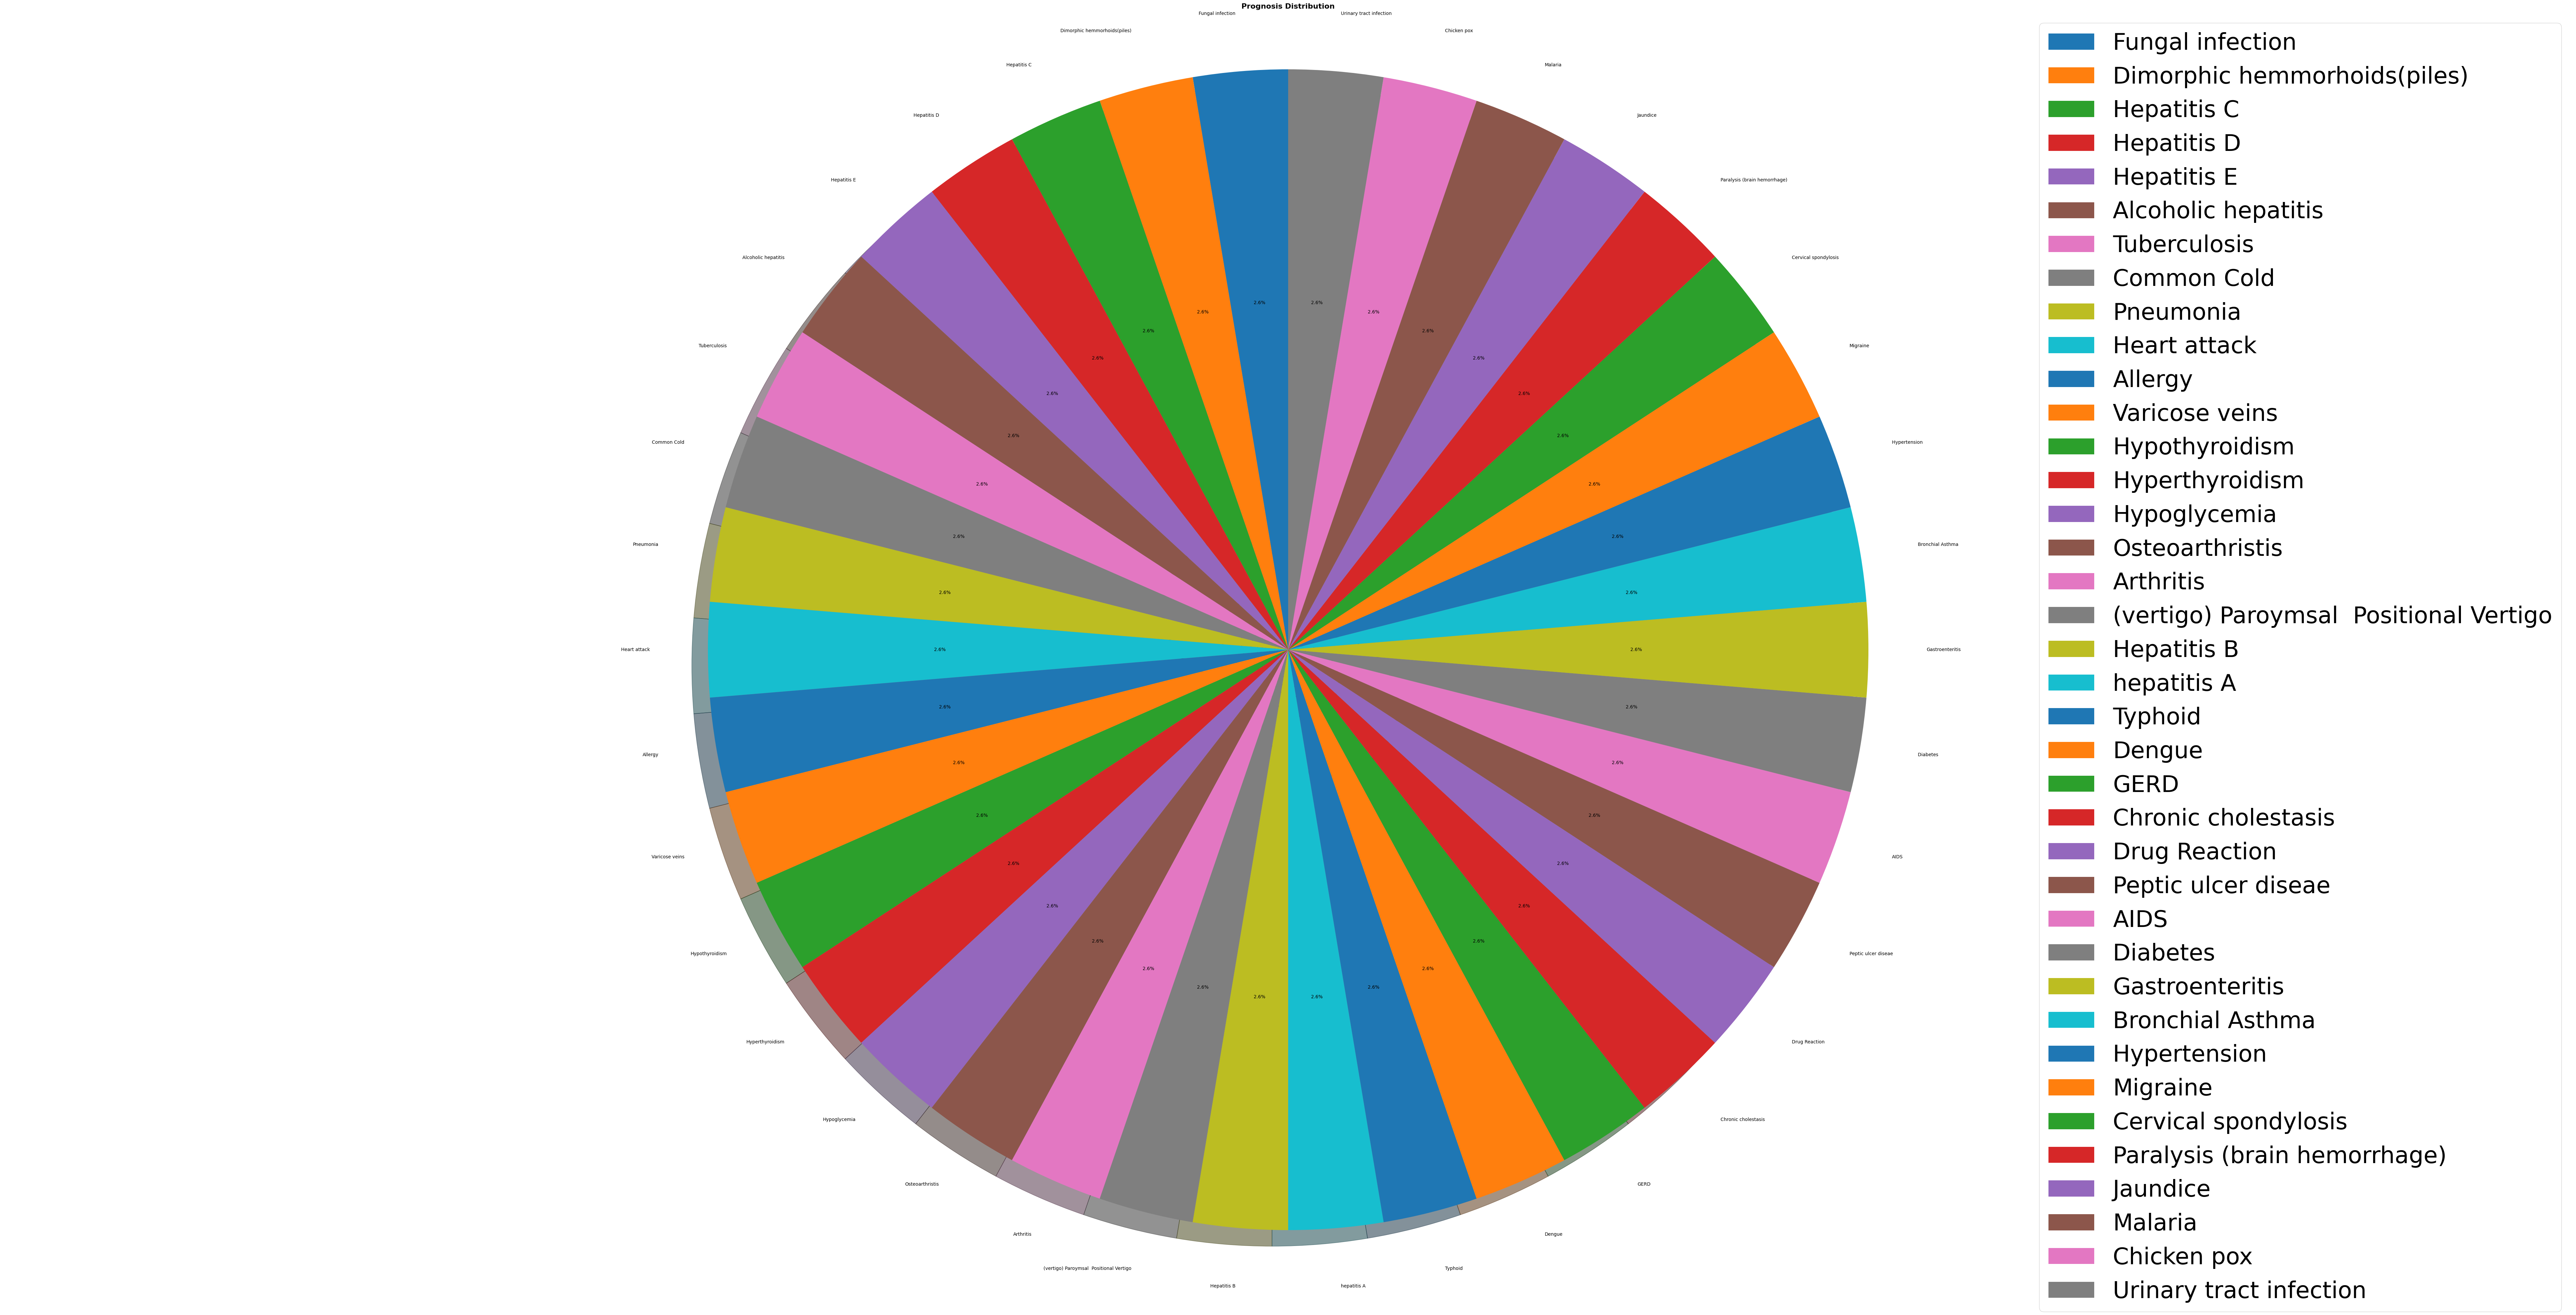

In [432]:
plt.figure(figsize=(100, 50))

category_counts = df['prognosis'].value_counts()


plt.pie(category_counts, labels=category_counts.index,  autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Prognosis Distribution', fontsize=16, fontweight='bold')
plt.legend(category_counts.index, loc='best', fontsize=50)
plt.axis('equal')

plt.show()

In [433]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'

# Get the number of columns (excluding 'prognosis')
num_columns = len(df.columns) - 1

# Calculate the number of rows and columns for the subplots grid
num_rows = int((num_columns + 2) / 3)  # Adjust the number of rows as needed
num_cols = 3  # Set the number of columns per row

# Calculate the figure size based on the number of rows and columns
fig_width = 16
fig_height = 6 * num_rows

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Flatten the axes array
axes = axes.flatten()

# Iterate over the columns (excluding 'prognosis') and create the bar plots
for i, column in enumerate(df.columns):
    if column != 'prognosis':
        cross_tab = pd.crosstab(df['prognosis'], df[column])
        ax = axes[i]

        cross_tab.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"Cross-Tabulation between 'prognosis' and '{column}'")
        ax.set_xlabel('Prognosis')
        ax.set_ylabel('Count')

# Hide the extra subplots if there are more axes than columns
if len(axes) > num_columns:
    for ax in axes[num_columns:]:
        ax.axis('off')

# Adjust the spacing between subplots
plt.tight_layout(pad=1.5)

# Display the plot
plt.show()

IndexError: index 105 is out of bounds for axis 0 with size 105

In [ ]:
num = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 
       'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 
       'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 
       'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 
       'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 
       'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 
       'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 
       'pain_during_bowel_movements', 'pain_in_anal_region', 'bloody_stool', 'irritation_in_anus', 'neck_pain', 
       'dizziness', 'cramps', 'bruising', 'obesity', 'swollen_legs', 'swollen_blood_vessels', 'puffy_face_and_eyes', 
       'enlarged_thyroid', 'brittle_nails', 'swollen_extremeties', 'excessive_hunger', 'extra_marital_contacts', 
       'drying_and_tingling_lips', 'slurred_speech', 'knee_pain', 'hip_joint_pain', 'muscle_weakness', 'stiff_neck', 
       'swelling_joints', 'movement_stiffness', 'spinning_movements', 'loss_of_balance', 'unsteadiness', 
       'weakness_of_one_body_side', 'loss_of_smell', 'bladder_discomfort', 'foul_smell_of urine',
       'continuous_feel_of_urine', 'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)', 'depression',
       'irritability', 'muscle_pain', 'altered_sensorium', 'red_spots_over_body', 'belly_pain', 
       'abnormal_menstruation', 'dischromic _patches', 'watering_from_eyes', 'increased_appetite', 
       'polyuria', 'family_history', 'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration', 
       'visual_disturbances', 'receiving_blood_transfusion', 'receiving_unsterile_injections', 'coma', 
       'stomach_bleeding', 'distention_of_abdomen', 'history_of_alcohol_consumption', 'fluid_overload.1', 
       'blood_in_sputum', 'prominent_veins_on_calf', 'palpitations', 'painful_walking', 'pus_filled_pimples', 
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting', 'small_dents_in_nails', 'inflammatory_nails',
       'blister', 'red_sore_around_nose', 'yellow_crust_ooze']

In [ ]:
#correlation
df[num].corr()

itching  skin_rash  nodal_skin_eruptions  \
itching                         1.000000   0.318158              0.326439   
skin_rash                       0.318158   1.000000              0.298143   
nodal_skin_eruptions            0.326439   0.298143              1.000000   
continuous_sneezing            -0.086906  -0.094786             -0.032566   
shivering                      -0.059893  -0.065324             -0.022444   
chills                         -0.175905  -0.029324             -0.065917   
joint_pain                     -0.160650   0.171134             -0.060200   
stomach_pain                    0.202850   0.161784             -0.032566   
acidity                        -0.086906  -0.094786             -0.032566   
ulcers_on_tongue               -0.059893  -0.065324             -0.022444   
muscle_wasting                 -0.059893  -0.065324             -0.022444   
vomiting                       -0.057763  -0.225046             -0.119543   
burning_micturition             0.207896   0.166507             -0.032103   
spotting_ urination             0.350585   0.298143             -0.022444   
fatigue                         0.069744  -0.105248             -0.120465   
weight_gain                    -0.061573  -0.067156             -0.023073   
anxiety                        -0.061573  -0.067156             -0.023073   
cold_hands_and_feets           -0.061573  -0.067156             -0.023073   
mood_swings                    -0.088129  -0.096120             -0.033025   
weight_loss                     0.091830  -0.139363             -0.047882   
restlessness                   -0.088129  -0.096120             -0.033025   
lethargy                        0.311436   0.067246             -0.047882   
patches_in_throat              -0.059893  -0.065324             -0.022444   
irregular_sugar_level          -0.061573  -0.067156             -0.023073   
cough                          -0.143855  -0.156900             -0.053907   
high_fever                      0.037309   0.117059             -0.092690   
sunken_eyes                    -0.059893  -0.065324             -0.022444   
breathlessness                 -0.126848  -0.138350             -0.047534   
sweating                       -0.159830  -0.174323             -0.059893   
dehydration                    -0.059893  -0.065324             -0.022444   
indigestion                    -0.086906  -0.094786             -0.032566   
headache                       -0.067585   0.053792             -0.081991   
yellowish_skin                  0.300936  -0.207998             -0.071463   
dark_urine                      0.253240  -0.157841             -0.054230   
nausea                         -0.069644  -0.090663             -0.082554   
loss_of_appetite                0.230103   0.049731             -0.082836   
pain_behind_the_eyes           -0.063212   0.341036             -0.023687   
back_pain                      -0.088129   0.204714             -0.033025   
constipation                   -0.088129  -0.096120             -0.033025   
abdominal_pain                  0.263282  -0.224648             -0.077184   
diarrhoea                      -0.143855  -0.156900             -0.053907   
mild_fever                      0.135127   0.110447             -0.041714   
yellow_urine                    0.361723  -0.067156             -0.023073   
yellowing_of_eyes               0.173673  -0.194432             -0.066802   
acute_liver_failure            -0.061573  -0.067156             -0.023073   
fluid_overload                       NaN        NaN                   NaN   
swelling_of_stomach            -0.061573  -0.067156             -0.023073   
swelled_lymph_nodes             0.138099   0.113396             -0.041332   
malaise                         0.221299   0.174242             -0.061117   
blurred_and_distorted_vision   -0.109271  -0.119179             -0.040947   
phlegm                         -0.111317  -0.121411             -0.041714   
throat_irritation            

<Axes: >

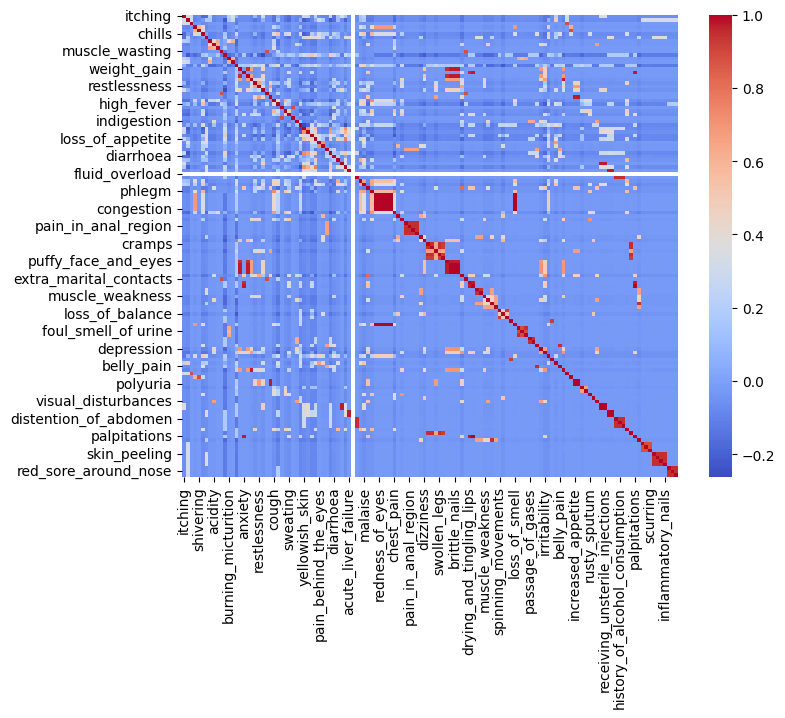

In [ ]:
#heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data=df[num].corr(),cmap='coolwarm')

In [ ]:
X = df.drop('prognosis',axis=1)
y = df['prognosis']

In [ ]:
X.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       0           0             0        0                 0   
2       0           0             0        0                 0   
3       0           0             0        0                 0   
4       0           0             0        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         0                    0                    0   
3               0         0                    0                    0   
4               0         0                    0                    0   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      0           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               0           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       0                 0                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               0          0           0             0                  0   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(3936, 132)

In [ ]:

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [RandomForestClassifier(n_estimators=100,max_features=85,random_state=42), GradientBoostingClassifier(n_estimators=250), DecisionTreeClassifier(random_state = 0), LogisticRegression()]

# The names of the models
algorithm_names = ["Random Forest Classifier", "Gradient Boosting Classifier", "Decision Tree Classifier", "Logistic Regression"]

In [ ]:
def model_train_test(model,X_train,y_train,X_test,y_test):
    
    #model training
    model.fit(X_train,y_train)
    
    #predict
    pred = model.predict(X_test)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y_test,pred))
    
    #classification report
    print("\n Classification report")
    print(classification_report(y_test,pred))

In [ ]:
from sklearn.model_selection import KFold, cross_val_score


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    print(algorithm_names[i])
    model_train_test(model,X_train, y_train, X_test, y_test)

Random Forest Classifier


accuracy score =  1.0

 Classification report
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        18
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        24
                    Alcoholic hepatitis       1.00      1.00      1.00        25
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        23
                       Bronchial Asthma       1.00      1.00      1.00        33
                   Cervical spondylosis       1.00      1.00      1.00        23
                            Chicken pox       1.00      1.00      1.00        21
                    Chronic cholestasis       1.00      1.00      1.00        15
                            Common Cold       1.00      1.00  

In [ ]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [ ]:
df_test.head()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0       0           0             0        0                 0   
1       1           0             0        0                 0   
2       0           0             1        1                 1   
3       0           0             0        0                 0   
4       0           0             1        0                 0   

   muscle_wasting  vomiting  burning_micturition  spotting_ urination  \
0               0         0                    0                    0   
1               0         0                    0                    0   
2               0         1                    0                    0   
3               0         1                    0                    0   
4               0         0                    1                    1   

   fatigue  weight_gain  anxiety  cold_hands_and_feets  mood_swings  \
0        0            0        0                     0            0   
1        0            0        0                     0            0   
2        0            0        0                     0            0   
3        0            0        0                     0            0   
4        0            0        0                     0            0   

   weight_loss  restlessness  lethargy  patches_in_throat  \
0            0             0         0                  0   
1            0             0         0                  0   
2            0             0         0                  0   
3            0             0         0                  0   
4            0             0         0                  0   

   irregular_sugar_level  cough  high_fever  sunken_eyes  breathlessness  \
0                      0      0           0            0               0   
1                      0      0           0            0               0   
2                      0      1           0            0               0   
3                      0      0           0            0               0   
4                      0      0           0            0               0   

   sweating  dehydration  indigestion  headache  yellowish_skin  dark_urine  \
0         0            0            0         0               0           0   
1         0            0            0         0               0           0   
2         0            0            0         0               0           0   
3         0            0            0         0               1           0   
4         0            0            0         0               0           0   

   nausea  loss_of_appetite  pain_behind_the_eyes  back_pain  constipation  \
0       0                 0                     0          0             0   
1       0                 0                     0          0             0   
2       0                 0                     0          0             0   
3       1                 1                     0          0             0   
4       0                 0                     0          0             0   

   abdominal_pain  diarrhoea  mild_fever  yellow_urine  yellowing_of_eyes  \
0               0          0           0             0                  0   
1               0          0           0             0                  0   
2               0          0           0             0                  0   
3               1          0           0             0                  1   
4               0          0           0             0                  0   

   acute_liver_failure  fluid_over

In [ ]:
#testing dataset percentage 
print("Testing Dataset percentage = ",100 * len(df_test)/(len(df)+len(df_test)))

Testing Dataset percentage =  0.8464328899637243


In [ ]:
df_test.describe()

itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
count  42.000000  42.000000             42.000000            42.000000   
mean    0.166667   0.190476              0.023810             0.047619   
std     0.377195   0.397437              0.154303             0.215540   
min     0.000000   0.000000              0.000000             0.000000   
25%     0.000000   0.000000              0.000000             0.000000   
50%     0.000000   0.000000              0.000000             0.000000   
75%     0.000000   0.000000              0.000000             0.000000   
max     1.000000   1.000000              1.000000             1.000000   

       shivering     chills  joint_pain  stomach_pain    acidity  \
count  42.000000  42.000000   42.000000     42.000000  42.000000   
mean    0.023810   0.166667    0.142857      0.047619   0.047619   
std     0.154303   0.377195    0.354169      0.215540   0.215540   
min     0.000000   0.000000    0.000000      0.000000   0.000000   
25%     0.000000   0.000000    0.000000      0.000000   0.000000   
50%     0.000000   0.000000    0.000000      0.000000   0.000000   
75%     0.000000   0.000000    0.000000      0.000000   0.000000   
max     1.000000   1.000000    1.000000      1.000000   1.000000   

       ulcers_on_tongue  muscle_wasting   vomiting  burning_micturition  \
count         42.000000       42.000000  42.000000            42.000000   
mean           0.023810        0.023810   0.404762             0.047619   
std            0.154303        0.154303   0.496796             0.215540   
min            0.000000        0.000000   0.000000             0.000000   
25%            0.000000        0.000000   0.000000             0.000000   
50%            0.000000        0.000000   0.000000             0.000000   
75%            0.000000        0.000000   1.000000             0.000000   
max            1.000000        1.000000   1.000000             1.000000   

       spotting_ urination    fatigue  weight_gain    anxiety  \
count            42.000000  42.000000    42.000000  42.000000   
mean              0.023810   0.404762     0.023810   0.023810   
std               0.154303   0.496796     0.154303   0.154303   
min               0.000000   0.000000     0.000000   0.000000   
25%               0.000000   0.000000     0.000000   0.000000   
50%               0.000000   0.000000     0.000000   0.000000   
75%               0.000000   1.000000     0.000000   0.000000   
max               1.000000   1.000000     1.000000   1.000000   

       cold_hands_and_feets  mood_swings  weight_loss  restlessness  \
count             42.000000    42.000000    42.000000     42.000000   
mean               0.023810     0.047619     0.095238      0.047619   
std                0.154303     0.215540     0.297102      0.215540   
min                0.000000     0.000000     0.000000      0.000000   
25%                0.000000     0.000000     0.000000      0.000000   
50%                0.000000     0.000000     0.000000      0.000000   
75%                0.000000     0.000000     0.000000      0.000000   
max                1.000000     1.000000     1.000000      1.000000   

        lethargy  patches_in_throat  irregular_sugar_level      cough  \
count  42.000000          42.000000              42.000000  42.000000   
mean    0.095238           0.023810               0.023810   0.119048   
std     0.297102           0.154303               0.154303   0.327770   
min     0.000000           0.000000               0.000000   0.000000   
25%     0.000000           0.000000               0.000000   0.000000   
50%     0.000000           0.000000               0.000000   0.000000   
75%     0.000000           0.000000               0.000000   0.000000   
max     1.000000           1.000000               1.000000   1.000000   

       high_fever  sunken_eyes  breathlessness   sweating  dehydration  \
count   42.000000    42.000000       42.000000  42.000000    42.000000   
mean     0.285714    

In [ ]:
df_test.columns[df.isnull().any()]

Index([], dtype='object')

In [ ]:
df_test.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
X = df_test.drop('prognosis',axis=1)
y = df_test['prognosis']

In [ ]:
def test_accuracy(model,X):
    
    #predict
    pred = model.predict(X)
    
    #accuracy score
    print("accuracy score = ",accuracy_score(y,pred))
    
    #classification report
    print("\n",classification_report(y,pred))

In [ ]:
from sklearn.model_selection import KFold, cross_val_score


#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    print(algorithm_names[i])
    test_accuracy(model,X)

Random Forest Classifier
accuracy score =  0.9761904761904762

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00         1
                                   AIDS       1.00      1.00      1.00         1
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       1.00      1.00      1.00         1
                                Allergy       1.00      1.00      1.00         1
                              Arthritis       1.00      1.00      1.00         1
                       Bronchial Asthma       1.00      1.00      1.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       1.00      1.00      1.00         1
                            Common Cold     

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l1", "l2"]}  # l1 lasso l2 ridge
logreg = LogisticRegression(solver='liblinear')  # Specify the solver here
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)

print("tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("accuracy:", logreg_cv.best_score_)


tuned hyperparameters (best parameters): {'C': 0.001, 'penalty': 'l2'}
accuracy: 1.0


In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
logreg_pred = logreg_cv.predict(X_test)

# Compute accuracy
logreg_acc = accuracy_score(y_test, logreg_pred)

# Get confidence scores (probability estimates) for each class
logreg_confidence = logreg_cv.predict_proba(X_test)

print("Accuracy on test set: {:.2f}%".format(logreg_acc * 100))


Accuracy on test set: 100.00%


In [ ]:
best_logreg = logreg_cv.best_estimator_
best_logreg

LogisticRegression(C=0.001, solver='liblinear')

In [ ]:
feature_importances = best_logreg.coef_[0]


In [ ]:
feature_importances

array([-0.10547546, -0.14159248, -0.02432612, -0.03741385, -0.02519982,
       -0.10043288, -0.09424474, -0.04301409, -0.04036135, -0.02010467,
       -0.02253462, -0.18633556, -0.04779947, -0.02175475, -0.24596948,
       -0.0190052 , -0.01448523, -0.0190052 , -0.03515163, -0.0594461 ,
       -0.03581347, -0.06443851, -0.02253462, -0.01963004, -0.07224804,
       -0.17301708, -0.02245369, -0.0605761 , -0.09064211, -0.02219163,
       -0.04146966, -0.07887254, -0.11678477, -0.06220139, -0.05649717,
       -0.13797438, -0.01022783, -0.03570967, -0.03892067, -0.13487104,
       -0.08100981, -0.03541869, -0.01298968, -0.09326632, -0.01004854,
        0.        , -0.02031695, -0.03551642, -0.07317858, -0.05540119,
       -0.0366492 , -0.01381541, -0.01381541, -0.01381541, -0.01381541,
       -0.01381541, -0.10323729, -0.02550088, -0.03079504, -0.02527535,
       -0.02497783, -0.02527535, -0.02527535, -0.05180743, -0.06832701,
       -0.02277784, -0.02277784, -0.04191823, -0.02302332, -0.02

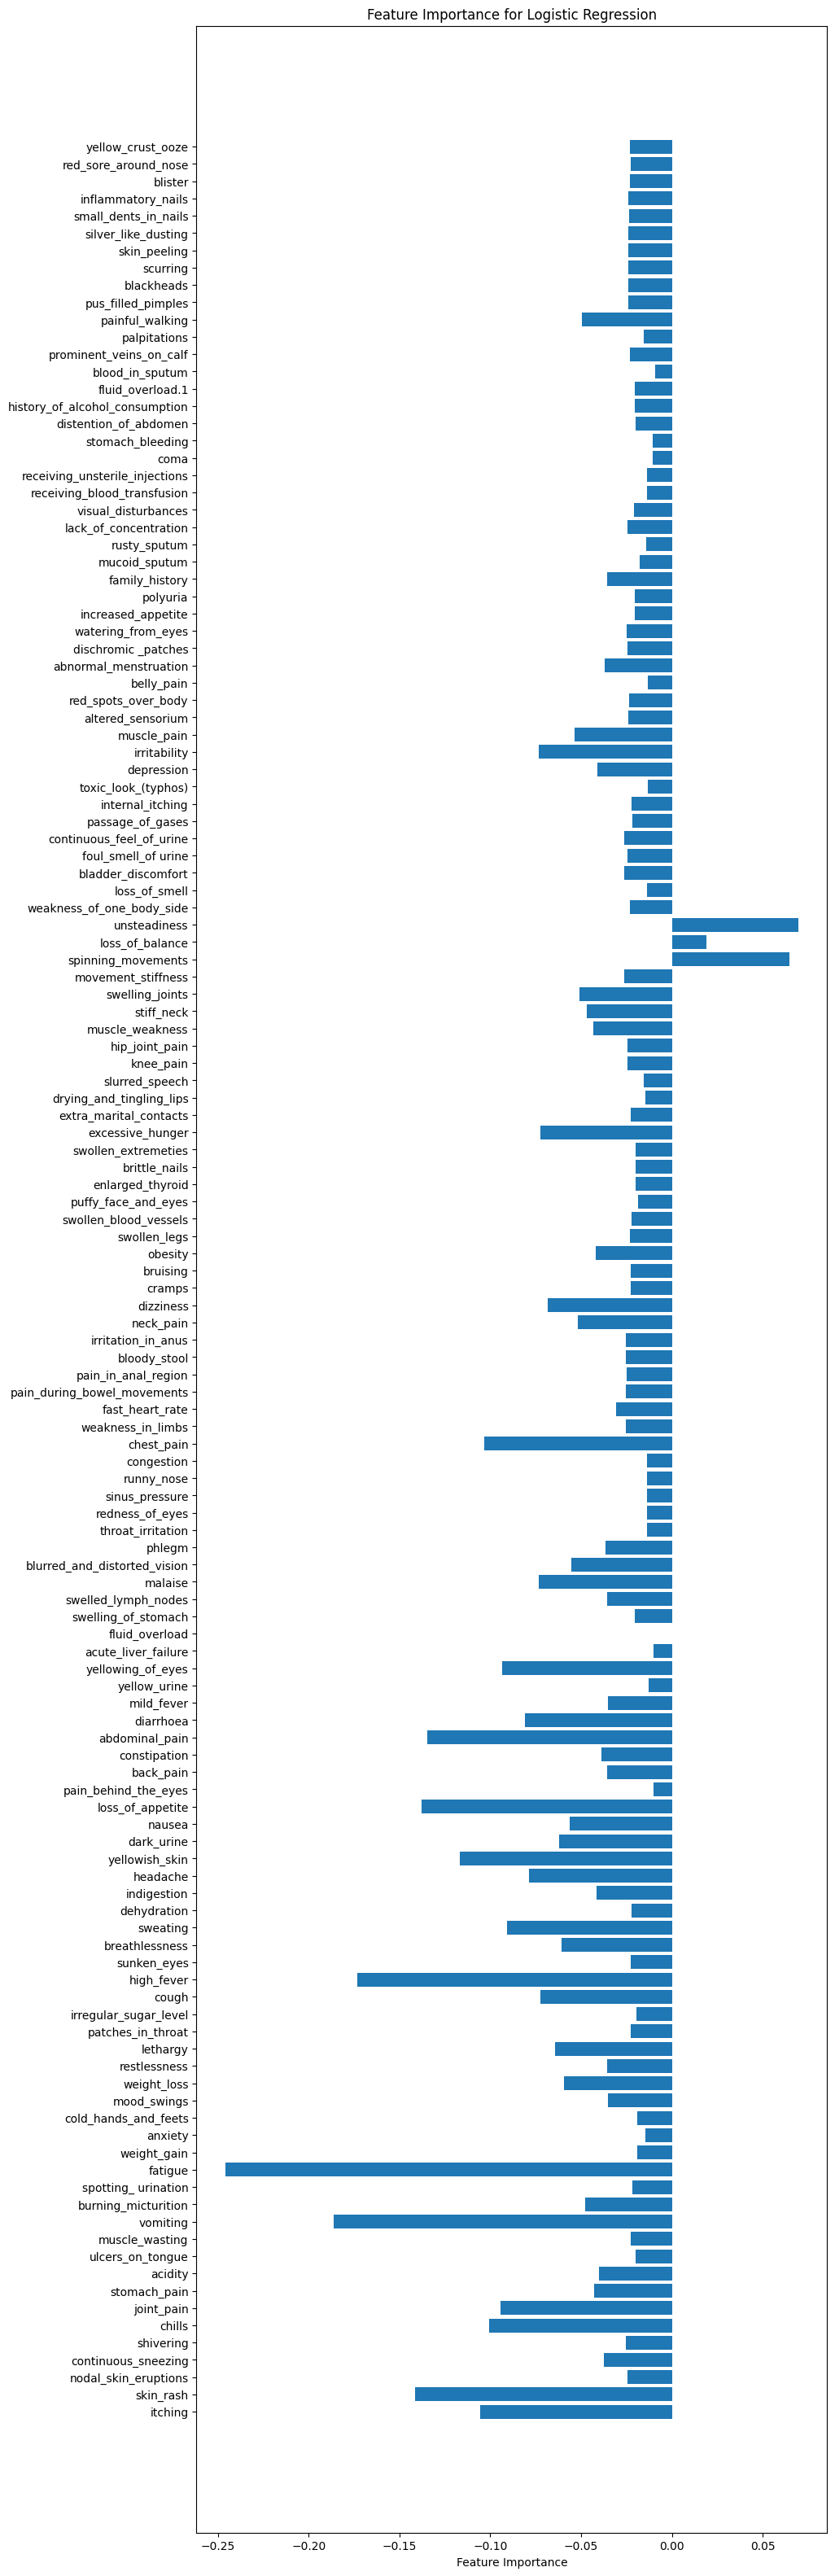

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 40))  # Adjust the values (width, height) as needed

# Create a horizontal bar plot
plt.barh(X.columns, best_logreg.coef_[0])

# Add labels, titles, etc. as needed
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Logistic Regression")

# Show the plot
plt.show()

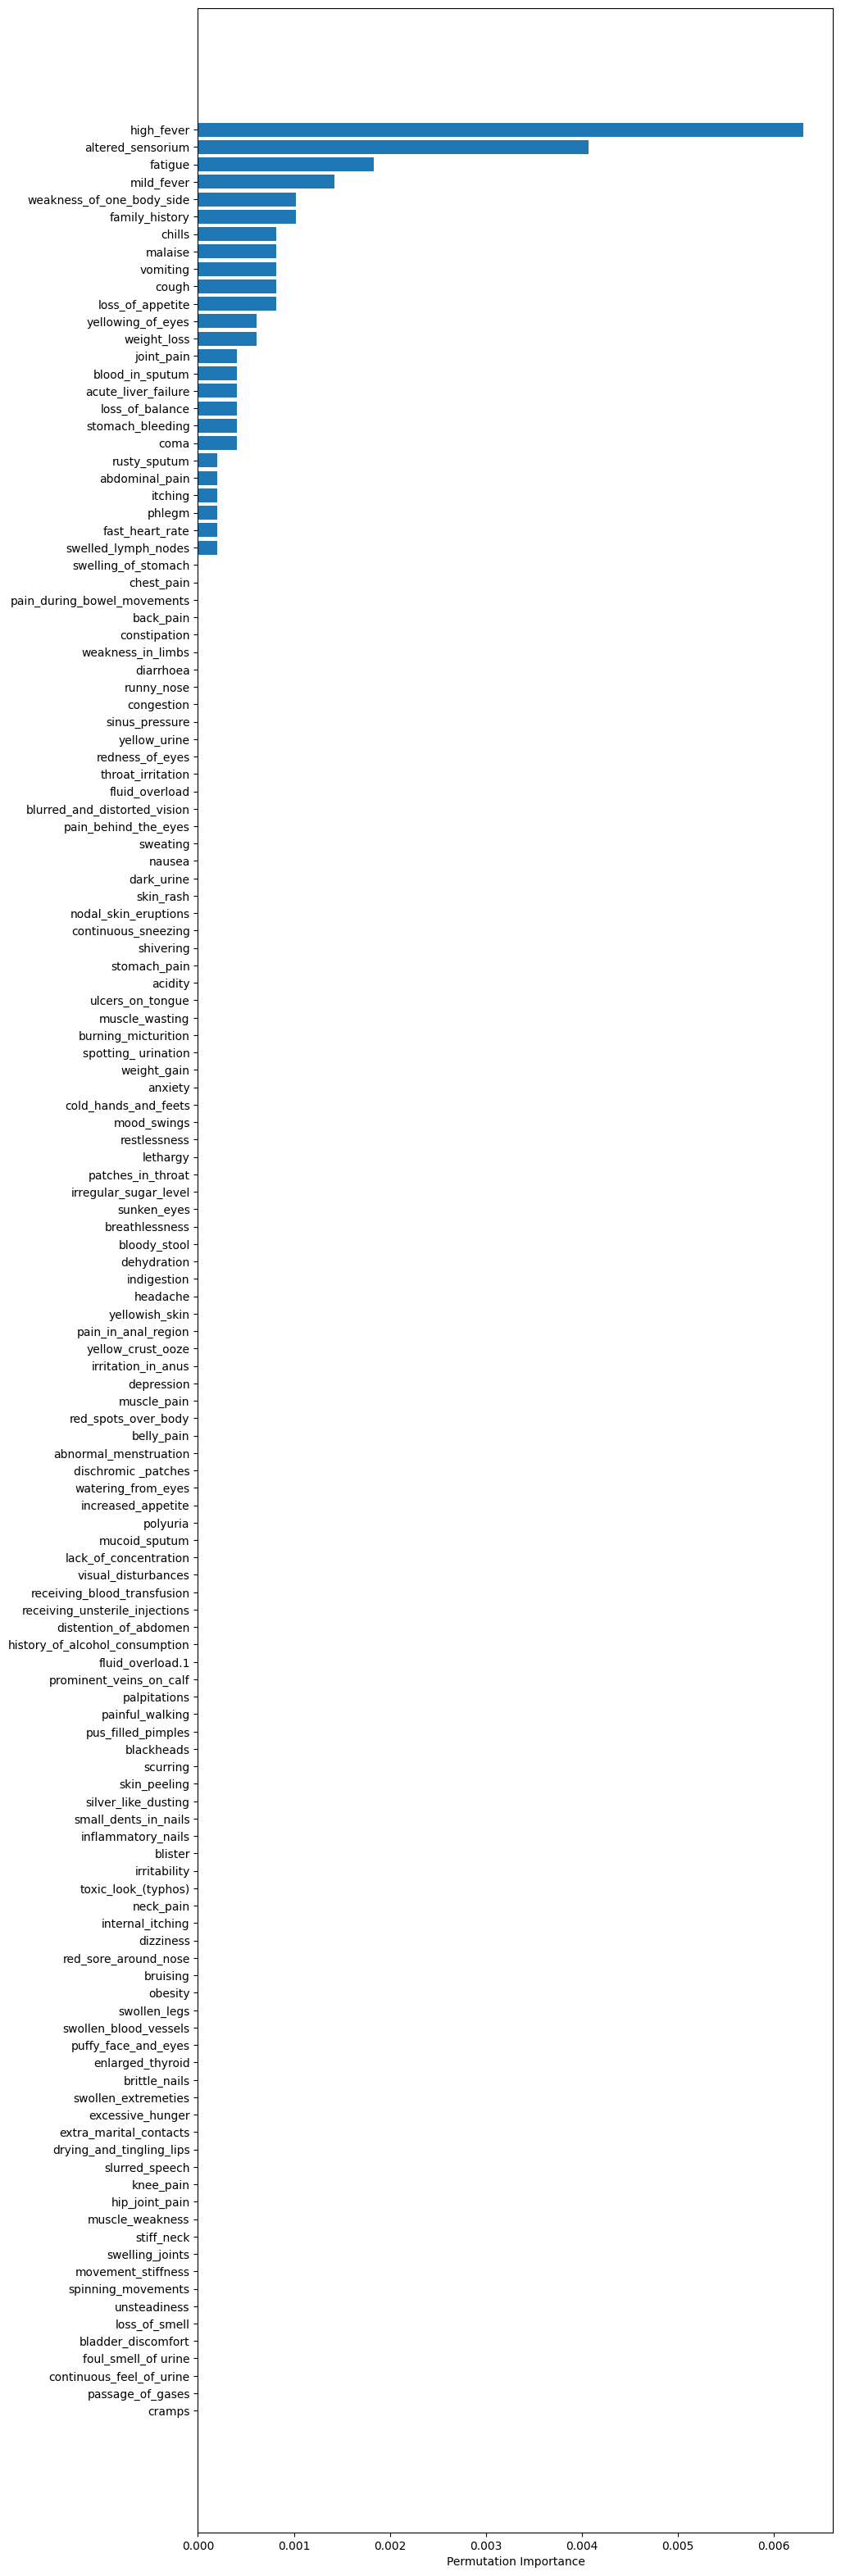

In [ ]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(best_logreg, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 40)) 
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
faker_data=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# Reshape the input data to match the number of features
faker_data_reshaped = np.array(faker_data).reshape(1, -1)  # Reshape z to have the same number of features as the training data

logreg_confidence = logreg_cv.best_estimator_.predict_proba(faker_data_reshaped)
print(logreg_confidence)
logreg_pred = logreg_cv.best_estimator_.predict(faker_data_reshaped)
print(logreg_pred)
max_confidence = max(logreg_confidence[0])
print("Maximum confidence:", max_confidence)

[[0.02445161 0.02456583 0.02462203 0.02444078 0.02465515 0.0246187
  0.02438018 0.02461174 0.0241731  0.024326   0.02416216 0.02392944
  0.02442799 0.02460841 0.02454637 0.02463473 0.02443704 0.02455202
  0.02450872 0.02420948 0.02437672 0.02414028 0.02401244 0.02451982
  0.02431804 0.02415699 0.02438794 0.02454783 0.02420625 0.02425263
  0.02443528 0.02458862 0.02452235 0.02450352 0.02422649 0.02457056
  0.02396029 0.02409578 0.02464932 0.02454648 0.0241209 ]]
['Allergy']
Maximum confidence: 0.02465515025361894


c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LEGION\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
